In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Crash-Statistics-Victoria.csv",usecols=[1,5,6,7,8,9,13,17,28])

s_date = input("Enter starting date in format of yyyy-mm-dd : ")
e_date = input("Enter Ending date in format of yyyy-mm-dd : ")

s_time = input("Enter starting time in format hh.mm.ss : ")
e_time = input("Enter ending time in format hh.mm.ss : ")



df['DATE'] = pd.to_datetime(df['ACCIDENT_DATE'])

filt = (df['DATE'] >= pd.to_datetime(s_date)) & (df['DATE'] < pd.to_datetime(e_date))
df = df.loc[filt]
filt = (df['ACCIDENT_TIME'] >= s_time) & (df['ACCIDENT_TIME'] < e_time)
df = df.loc[filt]
df
#pd.to_timedelta(10.00, unit="h")




,ts,ACCIDENT_DATE,ACCIDENT_TIME,DATE,ALCOHOLTIME,ACCIDENT_TYPE,LIGHT_CONDITION,SPEED_ZONE,INJ_OR_FATAL
24854,NaN,5/5/2015,01.56.00,2015-05-05,Yes,Struck animal,Dark No street lights,100 km/hr,1
24856,NaN,5/5/2015,06.35.00,2015-05-05,No,Collision with vehicle,Dark Street lights on,60 km/hr,1
24860,NaN,5/5/2015,06.35.00,2015-05-05,No,Struck Pedestrian,Dark Street lights on,60 km/hr,1
24862,NaN,5/5/2015,08.28.00,2015-05-05,No,Collision with vehicle,Day,60 km/hr,3
24902,NaN,5/5/2015,08.55.00,2015-05-05,No,Collision with a fixed object,Day,60 km/hr,1
...,...,...,...,...,...,...,...,...,...
28897,NaN,5/6/2015,08.00.00,2015-05-06,No,Collision with vehicle,Dusk/Dawn,60 km/hr,1
29024,NaN,5/6/2015,23.55.00,2015-05-06,Yes,Collision with a fixed object,Dark Street lights on,Not known,1
29421,NaN,5/6/2015,14.30.00,2015-05-06,No,Vehicle overturned (no collision),Day,50 km/hr,1
29884,NaN,5/5/2015,18.15.00,2015-05-05,Yes,Struck Pedestrian,Dark Street lights unknown,Not known,2


0 24
2
00.00.00 01.00.00  :  0.0
01.00.00 02.00.00  :  0.5
02.00.00 03.00.00  :  0.5
03.00.00 04.00.00  :  0.5
04.00.00 05.00.00  :  0.0
05.00.00 06.00.00  :  1.0
06.00.00 07.00.00  :  2.5
07.00.00 08.00.00  :  1.0
08.00.00 09.00.00  :  3.0
09.00.00 10.00.00  :  2.0
10.00.00 11.00.00  :  2.0
11.00.00 12.00.00  :  0.5
12.00.00 13.00.00  :  1.5
13.00.00 14.00.00  :  2.5
14.00.00 15.00.00  :  2.0
15.00.00 16.00.00  :  1.5
16.00.00 17.00.00  :  2.5
17.00.00 18.00.00  :  3.5
18.00.00 19.00.00  :  3.0
19.00.00 20.00.00  :  2.5
20.00.00 21.00.00  :  1.0
21.00.00 22.00.00  :  0.0
22.00.00 23.00.00  :  1.5
23.00.00 24.00.00  :  0.5
24 24


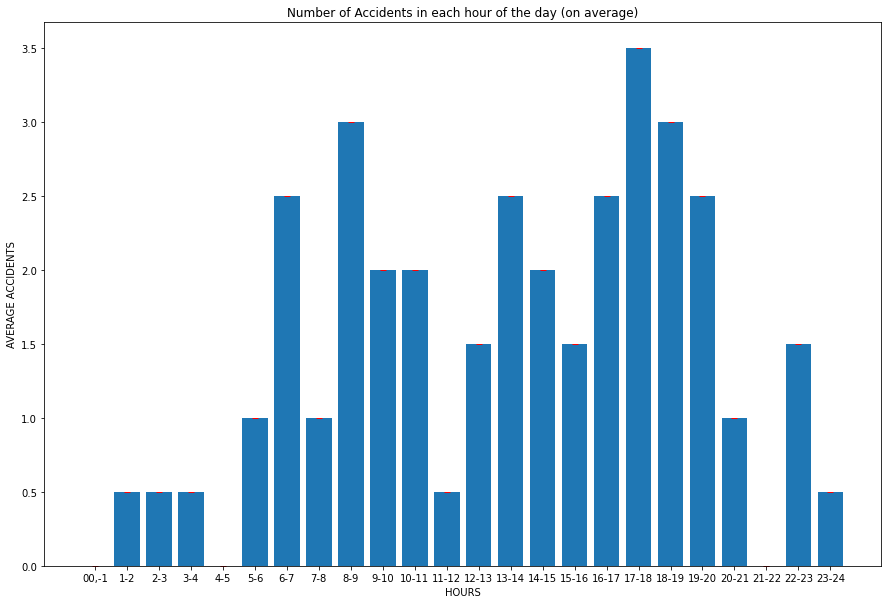

In [186]:
lst = ['00.00.00', '01.00.00', '02.00.00', '03.00.00', '04.00.00', '05.00.00', '06.00.00', '07.00.00', '08.00.00', '09.00.00', '10.00.00', '11.00.00', '12.00.00', '13.00.00', '14.00.00', '15.00.00', '16.00.00', '17.00.00', '18.00.00', '19.00.00', '20.00.00', '21.00.00', '22.00.00', '23.00.00', '24.00.00']
lstNew = ['00,-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24']
in1 = lst.index(s_time)
in2 = lst.index(e_time)

print(in1, in2)


lstN = []
if in2 < len(lst)-1:
    lstN = lstNew[in1:in2]

elif in2 == len(lst)-1:
    lstN = lstNew[in1:]
length = len(lst)

accidents = []

t1 = pd.to_datetime(s_date)
t2 = pd.to_datetime(e_date)

difference = int(pd.Timedelta(t2-t1).days)


print(difference)
for i in range(in1, in2):
    timeperiod = (df['ACCIDENT_TIME'] >=lst[i]) & (df['ACCIDENT_TIME'] < lst[i+1])
    dk = df.loc[timeperiod]
    timeperiod = (df['ACCIDENT_TIME'] >=lst[i]) & (df['ACCIDENT_TIME'] < lst[i+1])
    print(lst[i], lst[i+1]," : ", dk.shape[0]/difference)
    accidents.append(dk.shape[0]/difference)


print(len(lstN), len(accidents))


fig, axes = plt.subplots(1,1, figsize = (15,10))
plt.bar(lstN,accidents)
plt.plot(lstN, accidents, "r_")
plt.xlabel("HOURS")
plt.ylabel("AVERAGE ACCIDENTS")
plt.title("Number of Accidents in each hour of the day (on average)")
plt.show()


In [174]:
in1 = lst.index(s_time)
in2 = lst.index(e_time)

print(in1, in2)

0 10


In [88]:
index_lst = df.index
print(index_lst)

for i in index_lst:
    string = str(df.at[int(i), 'ACCIDENT_DATE'])

    element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
    tuple = element.timetuple()
    timestamp = time.mktime(tuple)

    df.at[int(i), 'ts'] = timestamp



#df.sort_values(by=['ts'])
df

Int64Index([24854, 24856, 24860, 24862, 24902, 24903, 24907, 24908, 24954,
            25007, 25008, 26256, 26486, 26585, 26797, 26801, 26833, 26837,
            26882, 27600, 28607, 28897],
           dtype='int64')


,ts,ACCIDENT_DATE,ACCIDENT_TIME,DATE,ALCOHOLTIME,ACCIDENT_TYPE,LIGHT_CONDITION,SPEED_ZONE,INJ_OR_FATAL
24854,1.430764e+09,5/5/2015,01.56.00,2015-05-05,Yes,Struck animal,Dark No street lights,100 km/hr,1
24856,1.430764e+09,5/5/2015,06.35.00,2015-05-05,No,Collision with vehicle,Dark Street lights on,60 km/hr,1
24860,1.430764e+09,5/5/2015,06.35.00,2015-05-05,No,Struck Pedestrian,Dark Street lights on,60 km/hr,1
24862,1.430764e+09,5/5/2015,08.28.00,2015-05-05,No,Collision with vehicle,Day,60 km/hr,3
24902,1.430764e+09,5/5/2015,08.55.00,2015-05-05,No,Collision with a fixed object,Day,60 km/hr,1
24903,1.430764e+09,5/5/2015,06.35.00,2015-05-05,No,Collision with vehicle,Dusk/Dawn,60 km/hr,1
24907,1.430764e+09,5/5/2015,05.45.00,2015-05-05,Yes,Collision with vehicle,Dark Street lights off,110 km/hr,1
24908,1.430764e+09,5/5/2015,09.50.00,2015-05-05,No,Collision with vehicle,Day,Not known,1
24954,1.430764e+09,5/5/2015,07.20.00,2015-05-05,No,Collision with vehicle,Dusk/Dawn,Not known,1
25007,1.430764e+09,5/5/2015,05.53.00,2015-05-05,Yes,Collision with a fixed object,Dark Street lights on,Not known,1


In [91]:
df.sort_values(by='ts')

,ts,ACCIDENT_DATE,ACCIDENT_TIME,DATE,ALCOHOLTIME,ACCIDENT_TYPE,LIGHT_CONDITION,SPEED_ZONE,INJ_OR_FATAL
24854,1.430764e+09,5/5/2015,01.56.00,2015-05-05,Yes,Struck animal,Dark No street lights,100 km/hr,1
27600,1.430764e+09,5/5/2015,08.32.00,2015-05-05,No,Collision with vehicle,Day,60 km/hr,1
25007,1.430764e+09,5/5/2015,05.53.00,2015-05-05,Yes,Collision with a fixed object,Dark Street lights on,Not known,1
24954,1.430764e+09,5/5/2015,07.20.00,2015-05-05,No,Collision with vehicle,Dusk/Dawn,Not known,1
24908,1.430764e+09,5/5/2015,09.50.00,2015-05-05,No,Collision with vehicle,Day,Not known,1
24907,1.430764e+09,5/5/2015,05.45.00,2015-05-05,Yes,Collision with vehicle,Dark Street lights off,110 km/hr,1
25008,1.430764e+09,5/5/2015,09.20.00,2015-05-05,No,Collision with vehicle,Day,Not known,1
24902,1.430764e+09,5/5/2015,08.55.00,2015-05-05,No,Collision with a fixed object,Day,60 km/hr,1
24862,1.430764e+09,5/5/2015,08.28.00,2015-05-05,No,Collision with vehicle,Day,60 km/hr,3
24860,1.430764e+09,5/5/2015,06.35.00,2015-05-05,No,Struck Pedestrian,Dark Street lights on,60 km/hr,1


In [77]:
import time
import datetime
  
  
string = "01/20/2015"
  
element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
tuple = element.timetuple()
timestamp = time.mktime(tuple)
  
print(timestamp)

1421692200.0


In [78]:
import time
import datetime
  
  
string = "01/21/2015"
  
element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
tuple = element.timetuple()
timestamp = time.mktime(tuple)
  
print(timestamp)

1421778600.0


In [79]:
import time
import datetime
  
  
string = "01/22/2015"
  
element = datetime.datetime.strptime(string,"%m/%d/%Y")
  
tuple = element.timetuple()
timestamp = time.mktime(tuple)
  
print(timestamp)

1421865000.0


In [90]:
print(1430851000.0-1430764000.0)

87000.0
